# Home assignment 3 - Katarina Kučuk

## Introduction

Moscow metro system is one of the best and most complex in the world. 

It is opened in 1935 with one 11-kilometre line and 13 stations and it was the first underground railway system in the Soviet Union. As of 2021, the Moscow Metro, excluding the Moscow Central Circle, the Moscow Central Diameters and the Moscow Monorail, has 241 stations (276 with Moscow Central Circle) and its route length is 412.1 km, making it the fifth-longest in the world and the longest outside China. (source: Wikipedia) 

It is the busiest metro system in Europe.

Because of its complexity and importance, any analysis of it can be useful.

Unfortunately, living in a world with many terroristic attacks, such as one in the metro system of Saint Petersburg back in 2017, security of busy places, for-instance, metro stations is of great value. Analyzing the importance of all nodes in our graph that represents the Moscow metro system, and combining those data with data of an average number of people during rush-hours, for example, can help to organize security systems so that they can be as much productive as possible.

Another thing that can be analyzed is the problem of the optimal route - what is the best way to come from point A to point B, especially when we have to change many lines. Of course, this problem and its analysis can again be improved by combining it with other datasets such as the number of metro users (that can be easily collected thanks to the fact that each person needs to validate their ticket at the entrance), train schedule, etc.

One more interesting problem I found while looking for data, and actually, a problem from which these datasets come from is finding an optimal route if you want to visit all Moscow metro stations in one day - something similar to the classical traveling salesman problem. The link to that article can be found [here](https://medium.com/altsoph/moscow-subway-optimal-complete-route-ac98796dd652). 

As for all international students, especially from smaller places than Moscow, adapting to the way of living in the capital of the Russian Federation can be challenging.

As an everyday user of the metro in Moscow, I wanted to analyze the importance of some train stations. For me, that can represent a good indication of what metro stations should be avoided during rush hours due to crowd, for example. 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import Dict, List

from collections import Counter

I used datasets that are in form of a txt file. Original files are in a tsv form and can be found in the abovementioned article. 

The first file consists the future nodes in our graph that represent stations in the metro system, with 9 attributes:


1.   id
2.   line name
3.   station name
4.   station type
5.   delay morning
6.   delay rush
7.   delay night
8.   lat
9.   lon

The second file consists of edges between our nodes, in our case, it represents routes in Moscow metro system. It has four columns:


1.   id from
2.   id to
3.   route type
4.   delay


We can see that we connect nodes based on their ids from the first file.

In [2]:
station_url = 'https://raw.githubusercontent.com/netspractice/network-science/main/datasets/stations_data.txt'
routes_url = 'https://raw.githubusercontent.com/netspractice/network-science/main/datasets/routes_data.txt'

In [3]:
stations = pd.read_csv(station_url)
routes = pd.read_csv(routes_url)

In [4]:
stations.head()

,id,line_name,station_name,station_type,delay_morning,delay_rush,delay_night,lat,lon
0,0,Sokolnicheskaya,Bulvar Rokossovskogo,deadend,120,90,360,55.814269,37.735117
1,1,Sokolnicheskaya,Cherkizovskaya,pass,120,90,360,55.802991,37.744825
2,2,Sokolnicheskaya,Preobrazhenskaya ploschad,pass,120,90,360,55.796172,37.715022
3,3,Sokolnicheskaya,Sokolniki,pass,120,90,360,55.789200,37.679706
4,4,Sokolnicheskaya,Krasnoselskaya,pass,120,90,360,55.779853,37.666077


In [5]:
routes.head()

,id_from,id_to,route_type,delay
0,0,1,drive,120
1,1,0,drive,120
2,1,2,drive,240
3,2,1,drive,240
4,2,3,drive,180


## Preprocessing the data

In [6]:
def metro_graph(stations, routes):
    
    graph = nx.Graph()

    stations_nodes = stations['id'].tolist()
    routes_edges = zip(routes['id_from'], routes['id_to'])
    
    graph.add_nodes_from(stations_nodes)
    graph.add_edges_from(routes_edges)

    nx.set_node_attributes(graph, stations['station_name'].to_dict(), 'station_name')
    nx.set_node_attributes(graph, stations['line_name'].to_dict(), 'line_name')

    return graph

In [7]:
G = metro_graph(stations, routes)

Basic information about our network:

In [8]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 194
Number of edges: 228
Average degree:   2.3505


In [9]:
print('Directed: ', nx.is_directed(G))
print('Weighted: ', nx.is_weighted(G))

Directed:  False
Weighted:  False


Degree : number of nodes
------------------------
1 : 16
2 : 118
3 : 39
4 : 18
5 : 3


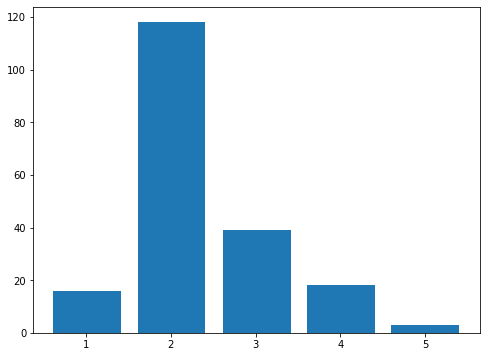

In [10]:
deg_sequence = [d for n, d in G.degree()]
count = Counter(deg_sequence)
print('Degree : number of nodes')
print('------------------------')
for item in count.items():
  print(item[0], ':', item[1])
his = np.histogram(deg_sequence, bins = len(deg_sequence))


plt.figure(figsize = (8, 6))
plt.bar(his[1][1:], his[0], align = 'center')
plt.show()

In [11]:
def metro_layout(stations):

    coordinates = stations[['id', 'lat', 'lon']].values
    layout = {}
    
    for coordinate in coordinates:
      layout[int(coordinate[0])] = [coordinate[2], coordinate[1]]
                 
    return layout

In [12]:
pos = metro_layout(stations)

In [13]:
line_color = {
    'Sokolnicheskaya': 'tab:red',
    'Zamoskvoretskaya': 'tab:green',
    'Arbatsko-Pokrovskaya': 'tab:blue',
    'Filevskaya': 'deepskyblue',
    'Koltsevaya': 'tab:brown',
    'Kaluzhsko-Rizhskaya': 'tab:orange',
    'Tagansko-Krasnopresnenskaya': 'tab:purple', 
    'Kalininskaya': 'gold',
    'Serpuhovsko-Timiryazevskaya': 'gray', 
    'Lyublinsko-Dmitrovskaya': 'yellowgreen',
    'Kahovskaya': 'paleturquoise', 
    'Butovskaya': 'lightblue', 
    'Monorels': 'royalblue'
}

In [14]:
def station_color(G, line_color = line_color):

    lines = nx.get_node_attributes(G, 'line_name')
    colors = {color: line_color[lines[color]] for color in lines}

    return colors

In [15]:
nx.set_node_attributes(G, station_color(G), 'color')

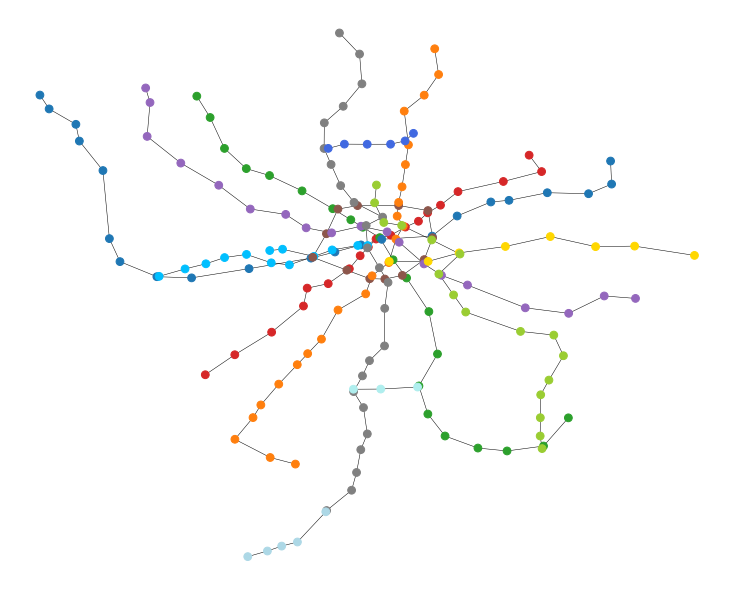

In [16]:
plt.figure(figsize=(10, 8))
nx.draw(G, 
        pos,
        width = 0.5,
        node_color = list(nx.get_node_attributes(G, 'color').values()),
        node_size=60)
plt.show()

## Results

In [17]:
def centralities(G):
    
    return {
        'degree': np.array(list(nx.degree_centrality(G).values())),
        'eigenvector': np.array(list(nx.eigenvector_centrality(G, max_iter = 1000).values())),
        'betweenness': np.array(list(nx.betweenness_centrality(G).values())),
        'closeness': np.array(list(nx.closeness_centrality(G).values())),    
        'pagerank': np.array(list(nx.pagerank(G).values())),
        'katz': np.array(list(nx.katz_centrality(G).values()))
    }

In [18]:
c = centralities(G)

In [19]:
def top10_centralities(G):

    r = {}
    
    for n, f in zip(['degree', 'eigenvector', 'betweenness', 'closeness', 'pagerank', 'katz'], [nx.degree_centrality, nx.eigenvector_centrality, nx.betweenness_centrality, nx.closeness_centrality, nx.pagerank, nx.katz_centrality]):
        if f == nx.eigenvector_centrality:
          sort = sorted(list(f(G, max_iter = 1000).items()), key = lambda x: x[1], reverse = True)
        else:
          sort = sorted(list(f(G).items()), key = lambda x: x[1], reverse = True)
        ids, centrality = zip(*sort)
        station_names = [nx.get_node_attributes(G, 'station_name')[y] for y in ids]
        line_names = [nx.get_node_attributes(G, 'line_name')[y] for y in ids]
        r[n] = pd.DataFrame({'station': station_names, 'line': line_names, 'centrality': centrality})
    
    return r

In [20]:
top_dfs = top10_centralities(G)

Degree centrality


,station,line,centrality
0,Biblioteka imeni Lenina,Sokolnicheskaya,0.025907
1,Arbatskaya,Arbatsko-Pokrovskaya,0.025907
2,Kievskaya,Filevskaya,0.025907
3,Chistye prudy,Sokolnicheskaya,0.020725
4,Tverskaya,Zamoskvoretskaya,0.020725
...,...,...,...
189,Novokosino,Kalininskaya,0.005181
190,Altufevo,Serpuhovsko-Timiryazevskaya,0.005181
191,Marina roscha,Lyublinsko-Dmitrovskaya,0.005181
192,Buninskaya alleya,Butovskaya,0.005181


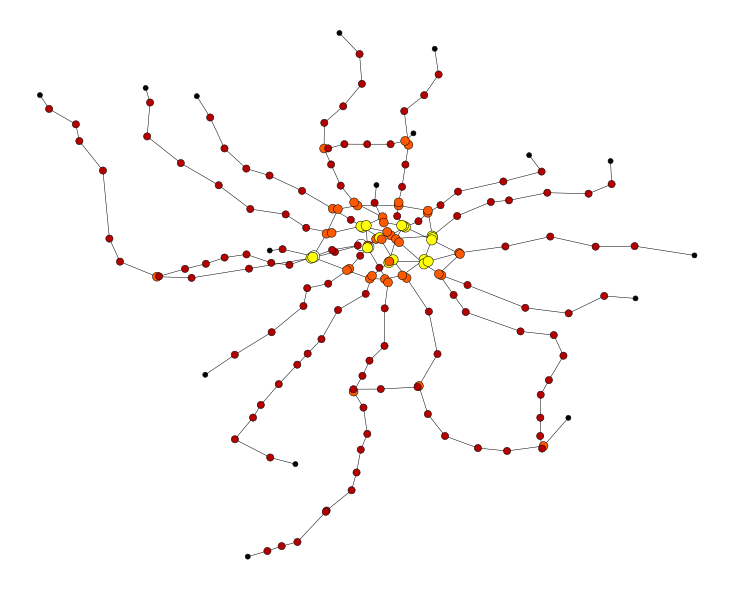

In [21]:
for c_key, scale, title in [['degree', 5000, 'Degree centrality']]:
    print(title)
    display(top_dfs[c_key])
    plt.figure(figsize = (10, 8))
    nx.draw(G, 
            pos,
            width = 0.5,
            linewidths = 0.5,
            edgecolors = 'black',
            cmap = plt.cm.hot,
            node_size = c[c_key] * scale,
            node_color = c[c_key])
    plt.show()

Degree centrality is defined as the number of links incident upon a node (i.e., the number of ties that a node has). In networkx package, the degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G, which is an explanation why we got values that are less than 1.

Since our graph represents a metro system, it is expected that nodes 'in the center' have a higher degree centrality than nodes far from the center of the graph as, for example, dead-end stations. In the table, we can see that three stations with the highest degree centralities are


1.   Biblioteka imeni Lenina
2.   Arbatskaya
3.   Kievskaya

Those are all stations close to the city center that have more than one line going through them. 

Eigenvector centrality


,station,line,centrality
0,Arbatskaya,Arbatsko-Pokrovskaya,3.371191e-01
1,Biblioteka imeni Lenina,Sokolnicheskaya,3.317484e-01
2,Borovitskaya,Serpuhovsko-Timiryazevskaya,2.848322e-01
3,Chehovskaya,Serpuhovsko-Timiryazevskaya,2.174831e-01
4,Teatralnaya,Zamoskvoretskaya,2.173889e-01
...,...,...,...
189,Ulitsa Starokachalovskaya,Butovskaya,6.914284e-08
190,Ulitsa Skobelevskaya,Butovskaya,2.209881e-08
191,Bulvar Admirala Ushakova,Butovskaya,7.056955e-09
192,Ulitsa Gorchakova,Butovskaya,2.234542e-09


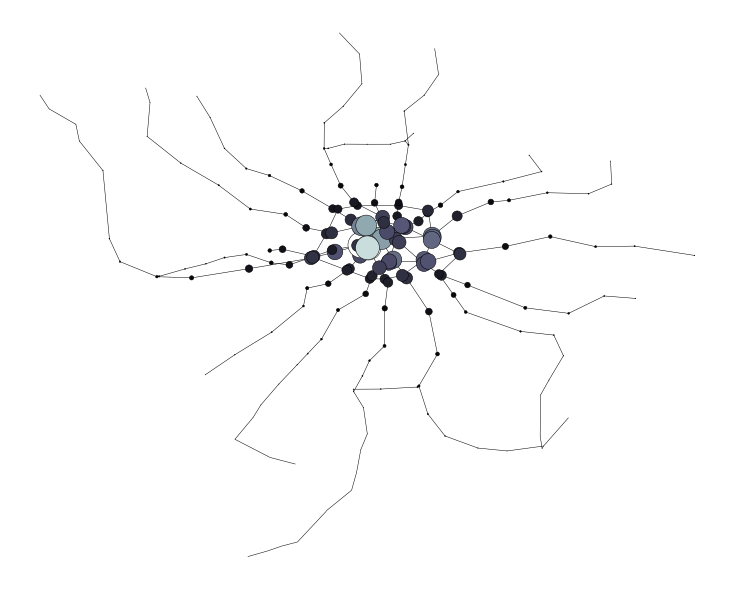

In [22]:
for c_key, scale, title in [['eigenvector', 2000, 'Eigenvector centrality']]:
    print(title)
    display(top_dfs[c_key])
    plt.figure(figsize = (10, 8))
    nx.draw(G, 
            pos,
            width = 0.5,
            linewidths = 0.5,
            edgecolors = 'black',
            cmap = plt.cm.bone,
            node_size = c[c_key] * scale,
            node_color = c[c_key])
    plt.show()

Eigenvector centrality is a measure of the influence of a node in a network. A high eigenvector score means that a node is connected to many nodes who themselves have high scores. 

Again, the most important nodes are ones in the center, with many lines on that station. The top 3 are:


1.   Arbatskaya
2.   Biblioteka imeni Lenina
3.   Borovitskaya

which all are actually at the same place, but on different metro lines.

Betweenness centrality


,station,line,centrality
0,Kievskaya,Koltsevaya,0.172276
1,Serpuhovskaya,Serpuhovsko-Timiryazevskaya,0.144095
2,Kievskaya,Arbatsko-Pokrovskaya,0.133394
3,Tulskaya,Serpuhovsko-Timiryazevskaya,0.130192
4,Park kultury,Koltsevaya,0.130139
...,...,...,...
189,Novokosino,Kalininskaya,0.000000
190,Altufevo,Serpuhovsko-Timiryazevskaya,0.000000
191,Marina roscha,Lyublinsko-Dmitrovskaya,0.000000
192,Buninskaya alleya,Butovskaya,0.000000


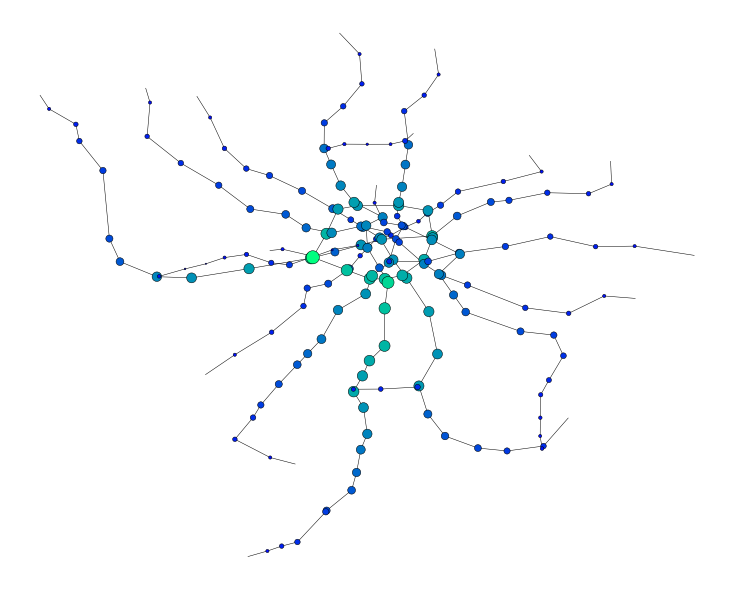

In [23]:
for c_key, scale, title in [['betweenness', 1000, 'Betweenness centrality']]:
    print(title)
    display(top_dfs[c_key])
    plt.figure(figsize = (10, 8))
    nx.draw(G, 
            pos,
            width = 0.5,
            linewidths = 0.5,
            edgecolors = 'black',
            cmap = plt.cm.winter,
            node_size = c[c_key] * scale,
            node_color = c[c_key])
    plt.show()

Betweenness centrality is a measure of centrality in a graph based on the shortest paths. Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through v.

Based on the results we got, we can see that the top 3 stations based on the betweenness centralities are:


1.   Kievskaya (Koltsevaya)
2.   Serpuhovskaya
3.   Kievskaya (Arbatsko-Pokrovskaya)

Those are all lines that are either on the Koltsevaya line or have a walking connection with them. Koltsevaya, also known as the brown line, is useful when we are looking for the shortest path because it has a connection with most of the radial lines.

Closeness centrality


,station,line,centrality
0,Teatralnaya,Zamoskvoretskaya,0.141288
1,Ploschad Revolyutsii,Arbatsko-Pokrovskaya,0.141185
2,Novokuznetskaya,Zamoskvoretskaya,0.139350
3,Taganskaya,Koltsevaya,0.138849
4,Kurskaya,Koltsevaya,0.138849
...,...,...,...
189,Novoyasenevskaya,Kaluzhsko-Rizhskaya,0.055845
190,Ulitsa Skobelevskaya,Butovskaya,0.053271
191,Bulvar Admirala Ushakova,Butovskaya,0.050643
192,Ulitsa Gorchakova,Butovskaya,0.048238


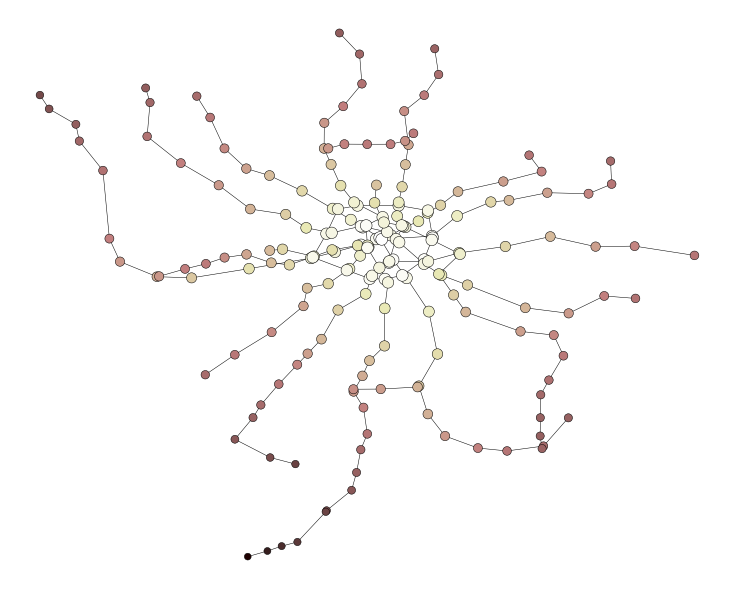

In [24]:
for c_key, scale, title in [['closeness', 1000, 'Closeness centrality']]:
    print(title)
    display(top_dfs[c_key])
    plt.figure(figsize = (10, 8))
    nx.draw(G, 
            pos,
            width = 0.5,
            linewidths = 0.5,
            edgecolors = 'black',
            cmap = plt.cm.pink,
            node_size = c[c_key] * scale,
            node_color = c[c_key])
    plt.show()

In a connected graph, closeness centrality of a node is a measure of centrality in a network, calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. Therefore, the more central a node is, the closer it is to all other nodes. 

In the networkx package, closeness centrality is normalized by the minimum distance possible.

As expected, nodes with the highest closeness centrality are in the city center. The top 3 are:

1.   Teatralnaya
2.   Ploschad Revolyutsii
3.   Novokuznetskaya



PageRank centrality


,station,line,centrality
0,Kievskaya,Filevskaya,0.009351
1,Biblioteka imeni Lenina,Sokolnicheskaya,0.007898
2,Arbatskaya,Arbatsko-Pokrovskaya,0.007849
3,Krasnogvardeyskaya,Zamoskvoretskaya,0.007556
4,Vystavochny tsentr,Monorels,0.007215
...,...,...,...
189,Novokosino,Kalininskaya,0.003229
190,Alma-Atinskaya,Zamoskvoretskaya,0.002913
191,Ulitsa Sergeya Eyzenshteyna,Monorels,0.002817
192,Marina roscha,Lyublinsko-Dmitrovskaya,0.002804


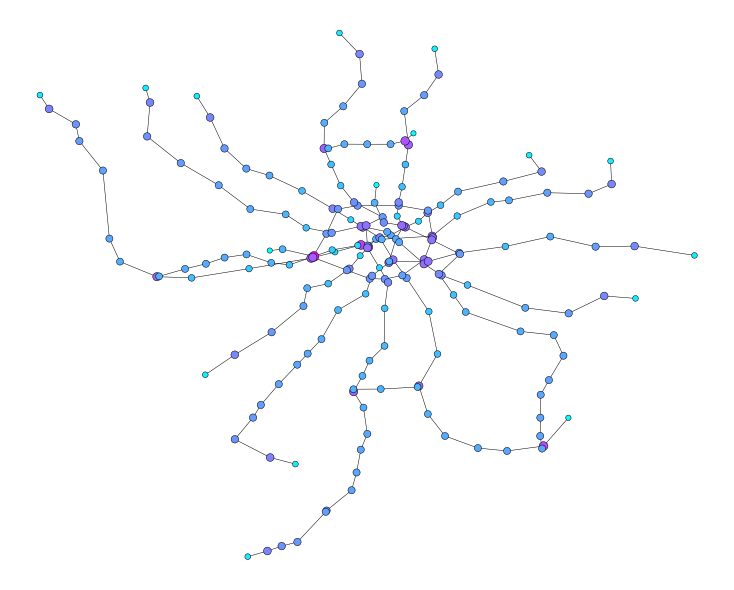

In [25]:
for c_key, scale, title in [['pagerank', 10000, 'PageRank centrality']]:
    print(title)
    display(top_dfs[c_key])
    plt.figure(figsize = (10, 8))
    nx.draw(G, 
            pos,
            width = 0.5,
            linewidths = 0.5,
            edgecolors = 'black',
            cmap = plt.cm.cool,
            node_size = c[c_key] * scale,
            node_color = c[c_key])
    plt.show()

PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links. It is originally computed to rank web pages in search engine results. PageRank represents a way of measuring the importance of website pages.

The PageRank algorithm outputs a probability distribution used to represent the likelihood that a person randomly clicking on links will arrive at any particular page. Basically, this means that based on our results, we have the highest chances to end up on one of the following stations if we use metro without a concrete goal or desire to come to a certain place:


1.   Kievskaya
2.   Biblioteka imeni Lenina
3.   Arbatskaya

Again, getting a metro stations that are in the city center and that are connected to more lines and other stations is more logical than getting, for example, any of the dead-end stations.

Katz centrality


,station,line,centrality
0,Arbatskaya,Arbatsko-Pokrovskaya,0.095810
1,Biblioteka imeni Lenina,Sokolnicheskaya,0.095638
2,Kievskaya,Filevskaya,0.092331
3,Borovitskaya,Serpuhovsko-Timiryazevskaya,0.089025
4,Chehovskaya,Serpuhovsko-Timiryazevskaya,0.088186
...,...,...,...
189,Schelkovskaya,Arbatsko-Pokrovskaya,0.060697
190,Pyatnitskoe shosse,Arbatsko-Pokrovskaya,0.060697
191,Planernaya,Tagansko-Krasnopresnenskaya,0.060697
192,Novoyasenevskaya,Kaluzhsko-Rizhskaya,0.060697


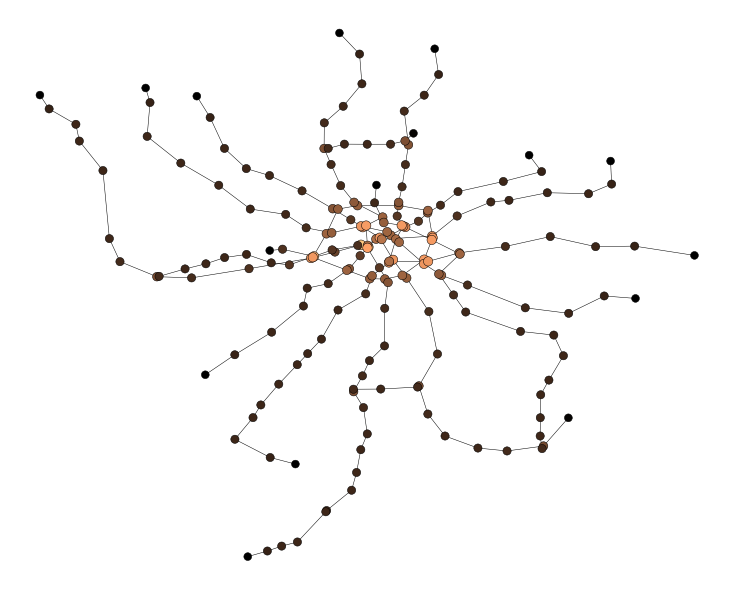

In [26]:
for c_key, scale, title in [['katz', 1000, 'Katz centrality']]:
    print(title)
    display(top_dfs[c_key])
    plt.figure(figsize = (10, 8))
    nx.draw(G, 
            pos,
            width = 0.5,
            linewidths = 0.5,
            edgecolors = 'black',
            cmap = plt.cm.copper,
            node_size = c[c_key] * scale,
            node_color = c[c_key])
    plt.show()

Katz centrality measures influence by taking into account the total number of walks between a pair of nodes. It was introduced by Leo Katz in 1953 and is used to measure the relative degree of influence of an actor (or node) within a social network.

It is similar to Google's PageRank and to the eigenvector centrality. Because of that, it is not a surprise that we got almost the same results as for the PageRank. The top 3 nodes are the same, but this time in different order:


1.   Arbatskaya
2.   Biblioteka imeni Lenina
3.   Kievskaya

## Conclusion

We saw using different centralities measures, that the most 'important' nodes are stations that are close to the city center. 

Because of that, it makes sense to pay more attention to the security of those stations, for example. To remind, targets of the terrorist attack in Saint Petersburg in 2017 were probably the two most crowded and important places in St Petersburg's metro system - metro station Sennaya Ploshchad that is connected to two more metro lines, and Ploshchad Vosstaniya metro station which is one of the most crowded in the whole system.

Also, these results can tell us on what metro stations we can expect the highest number of people. For a more detailed analysis, it would be good to combine these results with more different datasets, as already stated in the introduction, but even without that, the results we got should be enough to, for example, conclude what metro stations we should avoid in case we do not prefer crowded places.